# **Define the Network Architecture**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNet, self).__init__()
        # Define the first hidden layer
        self.hidden1 = nn.Linear(input_size, hidden_size)
        # Define the second hidden layer
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        # Define the output layer
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass the input through the first hidden layer and apply the ReLU activation function
        x = F.relu(self.hidden1(x))
        # Pass through the second hidden layer and apply the ReLU activation function
        x = F.relu(self.hidden2(x))
        # Pass through the output layer
        x = self.output(x)
        return x


# **Instantiate the Network and Prepare for Training**

In [ ]:
# Instantiate the neural network
input_size = 3  # Since we have three input features
hidden_size = 64  # Example hidden layer size
output_size = 1  # We're doing regression, so we need one output value

model = ThreeLayerNet(input_size, hidden_size, output_size)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# **Generate Synthetic Data and Prepare DataLoader**

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Parameters for the equation
a, b, c, d = 2, 1.5, -3, 0.5

# Generate synthetic data
np.random.seed(42)  # For reproducibility
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x3 = np.random.uniform(-1, 1, 1000)
y = a * (x1 ** 2) + b * x2 + c * np.sin(x3) + d

# Combine x1, x2, x3 into a single array
X = np.vstack((x1, x2, x3)).T

# Split the data into training and testing sets
train_size = int(0.8 * len(X))  # 80% of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert the numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create datasets from tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders for the training and testing data
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


# **Training Loop**

In [ ]:
# Number of epochs (iterations over the entire training dataset)
num_epochs = 100

# Track loss for plotting
train_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    batch_losses = []

    for X_batch, y_batch in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        y_pred = model(X_batch)

        # Compute loss
        loss = criterion(y_pred, y_batch)

        # Backpropagation
        loss.backward()

        # Update the weights
        optimizer.step()

        # Record the batch loss
        batch_losses.append(loss.item())

    # Record the average loss for this epoch
    avg_loss = np.mean(batch_losses)
    train_losses.append(avg_loss)

    # Print the average loss for the epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')


Epoch 1/100, Loss: 4.3903
Epoch 2/100, Loss: 2.5279
Epoch 3/100, Loss: 0.8001
Epoch 4/100, Loss: 0.2470
Epoch 5/100, Loss: 0.1687
Epoch 6/100, Loss: 0.1067
Epoch 7/100, Loss: 0.0583
Epoch 8/100, Loss: 0.0286
Epoch 9/100, Loss: 0.0164
Epoch 10/100, Loss: 0.0129
Epoch 11/100, Loss: 0.0117
Epoch 12/100, Loss: 0.0104
Epoch 13/100, Loss: 0.0096
Epoch 14/100, Loss: 0.0086
Epoch 15/100, Loss: 0.0079
Epoch 16/100, Loss: 0.0071
Epoch 17/100, Loss: 0.0070
Epoch 18/100, Loss: 0.0064
Epoch 19/100, Loss: 0.0059
Epoch 20/100, Loss: 0.0056
Epoch 21/100, Loss: 0.0051
Epoch 22/100, Loss: 0.0050
Epoch 23/100, Loss: 0.0047
Epoch 24/100, Loss: 0.0045
Epoch 25/100, Loss: 0.0043
Epoch 26/100, Loss: 0.0041
Epoch 27/100, Loss: 0.0041
Epoch 28/100, Loss: 0.0038
Epoch 29/100, Loss: 0.0036
Epoch 30/100, Loss: 0.0035
Epoch 31/100, Loss: 0.0034
Epoch 32/100, Loss: 0.0034
Epoch 33/100, Loss: 0.0033
Epoch 34/100, Loss: 0.0032
Epoch 35/100, Loss: 0.0029
Epoch 36/100, Loss: 0.0028
Epoch 37/100, Loss: 0.0028
Epoch 38/1

# **Evaluate the Model on Test Data**

Test Loss: 0.0014


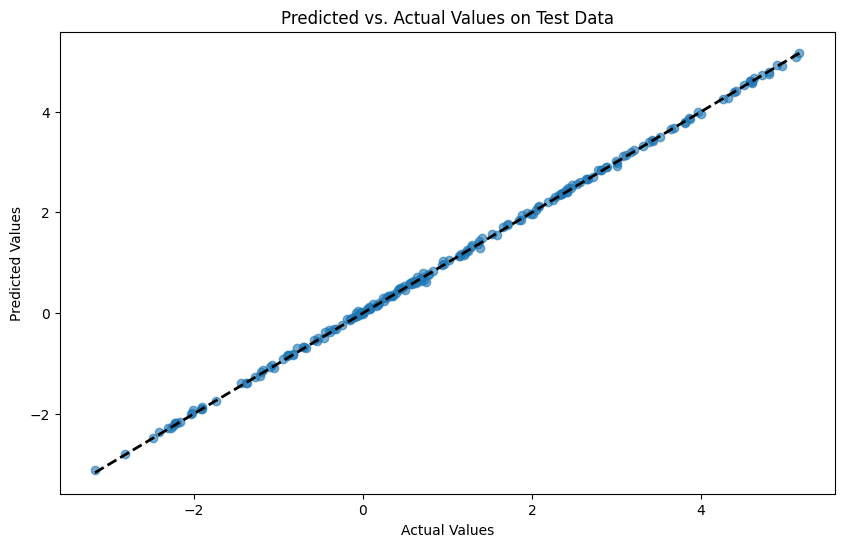

In [ ]:
# Set the model to evaluation mode
model.eval()

# No need to track the gradients, since we are not updating the weights
with torch.no_grad():
    # Run the model on the test data
    y_test_pred = model(X_test_tensor)

# Calculate the test loss
test_loss = criterion(y_test_pred, y_test_tensor).item()
print(f'Test Loss: {test_loss:.4f}')

# Convert predictions and actual values to numpy arrays for plotting
y_test_pred = y_test_pred.numpy()
y_test_actual = y_test_tensor.numpy()

# Visualizing the test results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values on Test Data')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.show()
